<a href="https://colab.research.google.com/github/sumitc29/Absenteeism_at_work/blob/master/Absenteeism_at_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Major Imports & data read**

In [0]:
"""imports """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import plotly.express as px
import plotly.graph_objects as go

"""Reading data"""
data = pd.read_csv("Absenteeism_at_work.csv" , delimiter=";")


# **EDA, Plots and Conclusions**

In [0]:
data.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [0]:
"""checking missing values"""
print(data.isnull().any())

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
Work load Average/day              False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
Body mass index                    False
Absenteeism time in hours          False
dtype: bool


Conclusion :
No missing value

In [207]:
target = 'Absenteeism time in hours'
data[target].nunique()

19

In [199]:
def get_plot(data, col):
  temp = data[col].value_counts().reset_index()
  temp = temp.rename(columns = {col : 'total_count' , 'index' : col})
  fig = px.bar(temp, x=col, y='total_count')
  fig.update_layout(title_text = f"Total counts of each class form {col} feature")
  fig.show()

  
get_plot(data , 'Absenteeism time in hours')


**conclusion**

Data is highly imbalanced, After 40 hours very low instances occured for perticular hour value.

In [0]:
"""Saperation of quantitative and qualitative"""
quantitative_val = ['Transportation expense','Distance from Residence to Work', 'Age' , 'Work load Average/day ' , 'Weight' , 'Height' , 'Body mass index']
qualitative_val = [each for each in data.columns if each not in quantitative_val]

**Distribution of each  variable**

In [200]:
for each in data.columns:
  get_plot(data , each)

**Conclusions**


*   ID : ID = 3 is one of the oldest worker since counts are highest 

*	Service time :Most of people work for 9hr or 18hr 

*	Disciplinary failure : Very few peoples failed to maintain discipline

*	Education : most of workers belong to level 1 education

*	Son : Most of these have no children 

*	Social drinker :  more than half are social drinker

*	Social smoker : very less are social smoker

*	Pet : most of worker don’t have any per




In [0]:
"""columns to be further evaluated"""
to_evaluate = [ 'Month of absence',
 'Day of the week',
 'Seasons',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet']

**Total absenteeism hour count based on various classes of qualitative variables**

In [204]:
"""getting total/SUM hours of absense in for every categorical variable"""
for each in to_evaluate:
  temp = data.groupby(each).sum().reset_index()
  fig = px.bar(temp, x=each, y='Absenteeism time in hours')
  fig.update_layout(title_text = f"Total absenteeism hours for each class form {each} feature")
  fig.show()

**Conclusions**


*	Month of Absence : Total absense time in hour is high in 3 and 7 month

*	Day of Week : Day 2 represent highest absence while day 5 is the lowest oner

*	Disciplinary of failure :  class 1 workers were not absent at all

*	Education : worker with education class 1 i.e. school have highest absent hours

*	Son : worker having 3 and 4 son have very low absent 

*	Social Drinker: Social drinker are with higher absenteeism 

*	Social smoker : non- smokers have higher absenteeism hours 



**Average absenteeism hour count based on various classes of qualitative variables**


In [205]:

"""getting average hours of absense in for eavery categorical variable"""
for each in to_evaluate:
  temp = data.groupby(each).mean().reset_index()
  fig = px.bar(temp, x=each, y='Absenteeism time in hours')
  fig.update_layout(title_text = f"Average absenteeism hours for each class form {each} feature")
  fig.show()

**Conclusions**


*	Month of Absence : Avg absense time in hour is high in 3, 4and 7 month

*	Day of Week : Day 2 represent highest absence while day 5 is the lowest oner

*	Disciplinary of failure :  class 1 workers were not absent at all

*	Education : worker with education class 1 i.e. school have highest average absent hours

*	Son : worker having 2 and 3 son have high average absent hours

*	Social Drinker: Social drinker are with higher absenteeism 

*	Social smoker : non- smokers have higher absenteeism hours 

*	Pet : Class having pet 12 having higher avg absent hours 



**Distribution of quantitative data Using Histograms**

In [193]:
#data[quantitative_val].hist(bins = 30)
for each in quantitative_val:
  fig = px.histogram(data, x=each , nbins=20)
  fig.update_layout(title_text=f"Distribution of {each}")
  fig.show()

**Conclusion**

* Transportation expense: It is for maximum peoples 160-180 and 220-240. Coming to conclusion most of therm travel using same medium of transport.
* Distance from residance to work :  
* Age : Most worker fall in the age of 28-29 and 36-41

No data is normally distributed

**Since Quantative data is also in discrete form , hence can be considered as qualitative and can be analysed as follow**

In [187]:
for col in quantitative_val:
  temp = data[col].value_counts().reset_index()
  temp = temp.rename(columns = {col:'count' , "index" : col})
  name = temp[col]
  count = temp['count']
  fig = go.Figure(data=[go.Pie(labels=name, values=count , hole=.3) ] )
  fig.update_layout(title_text=f"distribution of {col}")
  fig.show()

**Conclusions**



*   Quantitative variables can be used as an qualitative variables, Since these are discrete and more in counts
*   MOre than 50% workers are undex=r 40 age and largest share of worker is form 28 years. These may be newly joined
*   Work load is nearly equally distributed 
*   Most of people belong to 89kg category which is above average weight 
*   Nearly 20% have bmi 31  and 17% have bmi of 25 which shows sign of overweightness
*   Using this data we can conclude hat workers are mostly involved in stationary work with no intense physical activities since BMI is high







**Average absenteeism hour count based on various classes of quantitative variables**

In [192]:
"""getting average hours of absense in for quantitative_val"""

for col in quantitative_val:
  temp = data.groupby(col).mean().reset_index()
  name = temp[col]
  count = temp['Absenteeism time in hours']
  fig = go.Figure(data=[go.Pie(labels=name, values=count , hole=.3) ] )
  fig.update_layout(title_text=f"average distribution of Absenteeism time in hours based on classes of {col} ")
  fig.show()

**Conclusions**


*   Worker haveing transporatation expense 288 showing highest average of Absenteeism time of 32.75
*   workers having distanvce of 12 to 17 resembles in high average absenteeism of time
*   worker form 58 age category have high absenteeism time , they may be ill most of time
*   People from BMI 30 class have higher absentee time since they are overweighted





In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

# **Preprocessing, Feature selection and modelling**

## **using classical classification model**

**Preprocessing and Feature selection**

In [0]:
"""Reading data"""
data = pd.read_csv("Absenteeism_at_work.csv" , delimiter=";")

y = data['Absenteeism time in hours']
x= data[[each for each in data.columns if each not in 'Absenteeism time in hours']]



"""selection of best parameters using chi2 vales"""
from sklearn.feature_selection import chi2
a = chi2(data[data.columns] , y)  

chi_dict = dict(zip(data.columns , list(a[0])))
to_use = [each for each in chi_dict.keys() if chi_dict[each] > 15 and each != "Absenteeism time in hours"]



"""replacing minors from target with mode"""
temp = data['Absenteeism time in hours'].value_counts().reset_index()
to_replace = [temp['index'][i] for i in range(len(temp)) if temp['Absenteeism time in hours'][i] < 20]
new_data = data.copy()
for each in to_replace:
  new_data['Absenteeism time in hours'] = new_data['Absenteeism time in hours'].replace(each , new_data['Absenteeism time in hours'].mode()[0])


"""getting new features and label"""
y = new_data['Absenteeism time in hours']
x= new_data[[each for each in new_data.columns if each not in 'Absenteeism time in hours']]

"""getting class weight"""
from sklearn.utils.class_weight import compute_class_weight as cw
weights_dict = dict(zip(new_data['Absenteeism time in hours'].unique() , list(cw('balanced' , new_data['Absenteeism time in hours'].unique() , new_data['Absenteeism time in hours']))))
w_array = np.ones(y.shape[0], dtype = 'float')
for i, val in enumerate(y):
    w_array[i] = weights_dict[val]



"""using only important features sorted by chi2"""
x=x[to_use]


"""OHE and feature extraction using PCA"""
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop  = 'first' , categories='auto')
x = ohe.fit_transform(x).toarray()


#feature extraction 
from sklearn.decomposition import PCA
pca = PCA(n_components=50 , random_state = 20)
x = pca.fit_transform(x)


"""Train test split"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42 , stratify = y)



**Model training and Evaluation**

In [211]:
"""evaluation function to genertae reasult"""
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score

def evalv(y_test , y_pred ,model):
  """evaluations"""
  print(f"results for {model}")
  print("f1 score is " , f1_score(y_test, y_pred, average='weighted'))
  print( 'accuracy is ', accuracy_score(y_test, y_pred,))
  from sklearn.metrics import confusion_matrix

  print("confusion matrix \n",confusion_matrix(y_test, y_pred))
  print("\n"*3)


"""Xgboost model"""
from xgboost import XGBClassifier
model = XGBClassifier(max_depth = 3 ,min_child_weight =0.5  , learning_rate  = 0.1 , n_estimators = 200 , scale_pos_weight= w_array)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evalv(y_test ,  y_pred , "Xgboost")

"""Random forest model"""
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200 , random_state=  0 , max_depth= 6 ,min_samples_split=8 , min_samples_leaf=1 ,  class_weight = 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evalv(y_test ,  y_pred , "RandomForestClassifier")

"""RidgeClassifier"""
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier(random_state =10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evalv(y_test ,  y_pred , "RidgeClassifier")


#ensamble of all above models
from sklearn.ensemble import  VotingClassifier

model1 = XGBClassifier(max_depth = 3 ,min_child_weight =0.5  , learning_rate  = 0.1 , n_estimators = 200 )
model2 = RandomForestClassifier(n_estimators = 200 , random_state=  0 , max_depth= 6 ,min_samples_split=8 , min_samples_leaf=1 , class_weight = 'balanced')
model3 = RidgeClassifier(random_state =10 )

model = VotingClassifier(estimators=[('xgb', model1), ('rf', model2), ('rc', model3)], voting='hard')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evalv(y_test ,  y_pred , "ensamble model")

results for Xgboost
f1 score is  0.5617966531302105
accuracy is  0.5878378378378378
confusion matrix 
 [[ 8  0  1  0  0  0]
 [ 0  4  1  6  0  7]
 [ 0  5 16  1  1  8]
 [ 0  0  3 11  2  6]
 [ 0  1  3  2  1  5]
 [ 0  2  4  3  0 47]]




results for RandomForestClassifier
f1 score is  0.5422319611143649
accuracy is  0.5540540540540541
confusion matrix 
 [[ 8  0  1  0  0  0]
 [ 0  6  0  3  0  9]
 [ 0  7 11  4  2  7]
 [ 0  2  3  9  1  7]
 [ 0  2  3  1  3  3]
 [ 0  4  0  4  3 45]]




results for RidgeClassifier
f1 score is  0.5306302351517452
accuracy is  0.5675675675675675
confusion matrix 
 [[ 8  0  1  0  0  0]
 [ 0  3  4  2  0  9]
 [ 0 10 14  3  0  4]
 [ 0  1  6  6  1  8]
 [ 0  3  2  1  1  5]
 [ 0  0  2  2  0 52]]




results for ensamble model
f1 score is  0.5665967577094182
accuracy is  0.5878378378378378
confusion matrix 
 [[ 8  0  1  0  0  0]
 [ 0  6  1  3  0  8]
 [ 0  7 13  3  1  7]
 [ 0  2  3  9  1  7]
 [ 0  2  3  1  2  4]
 [ 0  3  3  1  0 49]]






**Parameter tuning**

Takes plenty of time

In [0]:
"""from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold


xgb_model = XGBClassifier()

parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5 ,8,12],
        'learning_rate': [0.01 , 0.05 , 0.1],
        'n_estimators': [100, 500 , 700 ,1000]
        }

clf = GridSearchCV(xgb_model, parameters, n_jobs=-1, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   verbose=2, refit=True)

clf.fit(x, y)

best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))"""

## **Deep NN model**

**Data Preprocessing for NN**

In [0]:
"""Reading data"""
data = pd.read_csv("Absenteeism_at_work.csv" , delimiter=";")

y = data['Absenteeism time in hours']
x= data[[each for each in data.columns if each not in 'Absenteeism time in hours']]



"""selection of best parameters using chi2 vales"""
from sklearn.feature_selection import chi2
a = chi2(data[data.columns] , y)  

chi_dict = dict(zip(data.columns , list(a[0])))
to_use = [each for each in chi_dict.keys() if chi_dict[each] > 15 and each != "Absenteeism time in hours"]



"""replacing minors from target with mode"""
temp = data['Absenteeism time in hours'].value_counts().reset_index()
to_replace = [temp['index'][i] for i in range(len(temp)) if temp['Absenteeism time in hours'][i] < 15]
new_data = data.copy()
for each in to_replace:
  new_data['Absenteeism time in hours'] = new_data['Absenteeism time in hours'].replace(each , new_data['Absenteeism time in hours'].mode()[0])


"""getting new features and label"""
y = new_data['Absenteeism time in hours']
x= new_data[[each for each in new_data.columns if each not in 'Absenteeism time in hours']]


"""using only important features sorted by chi2"""
x=x[to_use]


"""OHE and feature extraction using PCA"""
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop  = 'first' , categories='auto')
x = ohe.fit_transform(x).toarray()


#feature extraction 
from sklearn.decomposition import PCA
pca = PCA(n_components=50 , random_state = 20)
x = pca.fit_transform(x)

"""this is special task other than general preprocessing model to get multivariable output"""
y = pd.get_dummies(y)

"""Train test split"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42 , stratify = y)


**MOdel BUilding and training**

In [214]:

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout 
from keras.layers.normalization import BatchNormalization

# Neural network
model = Sequential()
model.add(Dense(256, input_dim=x.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(new_data['Absenteeism time in hours'].nunique(), activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=16 , shuffle=False)


Epoch 1/200
592/592 [==============================] - 4s 7ms/step - loss: 2.7179 - acc: 0.1993
Epoch 2/200
592/592 [==============================] - 0s 212us/step - loss: 2.1696 - acc: 0.2686
Epoch 3/200
592/592 [==============================] - 0s 199us/step - loss: 1.9249 - acc: 0.3209
Epoch 4/200
592/592 [==============================] - 0s 207us/step - loss: 1.7885 - acc: 0.3699
Epoch 5/200
592/592 [==============================] - 0s 195us/step - loss: 1.7526 - acc: 0.3750
Epoch 6/200
592/592 [==============================] - 0s 213us/step - loss: 1.6878 - acc: 0.3784
Epoch 7/200
592/592 [==============================] - 0s 219us/step - loss: 1.6088 - acc: 0.4206
Epoch 8/200
592/592 [==============================] - 0s 217us/step - loss: 1.5310 - acc: 0.4375
Epoch 9/200
592/592 [==============================] - 0s 210us/step - loss: 1.5700 - acc: 0.4459
Epoch 10/200
592/592 [==============================] - 0s 220us/step - loss: 1.4804 - acc: 0.4223
Epoch 11/200
592/592 

**Evaluation of NN mdoel**

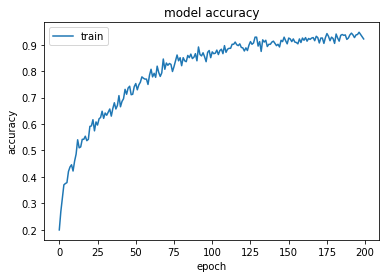

f1 score is  0.46324647654434886
accuracy is 0.4594594594594595


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



In [215]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


from sklearn.metrics import f1_score ,accuracy_score

data = model.predict(X_test)

"""Since we are removing all the classes less than occurance of 15 from the target"""
data = pd.DataFrame({0: data[:, 0], 1: data[:, 1] , 2: data[:, 2] ,3: data[:, 3] , 4: data[:, 4] , 8: data[:, 5] , 16: data[:, 6] , 24: data[:, 7]})

y_pred = data.idxmax(axis=1)

print("f1 score is ",f1_score(y_test.idxmax(axis=1), data.idxmax(axis=1), average='weighted'))
print("accuracy is" , accuracy_score(y_test.idxmax(axis=1) , y_pred ))


**Conclusion**

Since given data is limited in amount ~740 instances

NN requires ample amount of data Hence unable to get better predictions 